# <font color = blue> Problema 3: 8.5/10
    
    
1) No lo hicieron de una manera eficiente. Se los pedí en clases que lo hicieran de otra manera. (- 1.5 puntos)
    
# <font color = blue> Problema 4: 6/10

1) Mal el orden en los ajustes es:  lineFit(log(L),log(S)) (-4 puntos) 2) No es lados^0.5
    


# <font color = red> Angela dos puntos menor por inasistencia

In [40]:
import numpy as np
import matplotlib.pyplot as plt



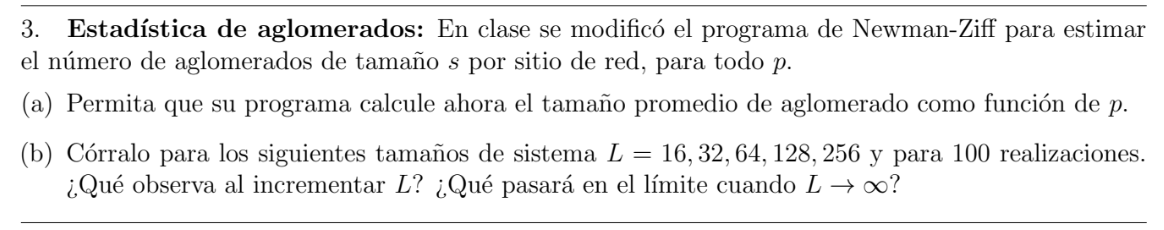

In [41]:
def lineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [42]:
def permutation():
    global order,N
    order = np.random.permutation(N)

# Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def vecino(s,j):
    global L,empty
    
    if j == 0: #izquierda
        if s%L ==0:
            return empty
        else:
            return s-1
    elif j==1: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
    elif j==2: #abajo
        if s//L == 0:
            return empty
        else:
            return s-L
    elif j==3: #arriba
        if s//L == L-1:
            return empty
        else:
            return s+L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

In [47]:
def percolate():
    global spanclussize,order,parent,nn,ipc,ns,N,pc,S,savg
    savg=0 #declaro donde se va a guardar el promedio 
    PSpan = []
    spanclussize = 0
    ns = np.zeros(N+1,dtype = int)
    parent = empty*np.ones(N,dtype=int)   
    S=np.zeros((N),dtype = int)

    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
        ns[1] += 1
        savg+=1 # Le sumo el nuevo cluster de 1 al cuadrado
        for j in range(4):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1= mergeroots(r1,findroot(s2))
            if (i+1-spanclussize) != 0: #PROFESOR: Bastaría con un if.
                 S[i]=((savg**2*ns)-spanclussize**2)/(i+1-spanclussize) #PROFESOR: ¿Por qué esta última np?
            else: 
                 S[i]=0
            break
        PSpan.append(spanclussize/(i+1.))
        if i == ipc:
            nspcpar  = np.copy(ns) 
    return np.array(PSpan),nspcpar,S

In [48]:
def mergeroots(r1,r2):
    global N,spanclussize,parent,ns,touchesLeft,touchesRight,S,pc,savg
    w=np.zeros(N)
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        savg-= (parent[r1])**2
        savg-=(parent[r2])**2
        
        parent[r1] += parent[r2]
        parent[r2] = r1
        ns[-parent[r1]] += 1
        savg+=(parent[r1])**2
        
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1
    else:
        ns[-parent[r1]] -= 1
        ns[-parent[r2]] -= 1
        savg-= (parent[r1])**2
        savg-=(parent[r2])**2
        
        parent[r2] += parent[r1]
        parent[r1] = r2
        ns[-parent[r2]] += 1
        savg+=(parent[r2])**2
        
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2

In [49]:
#Datos, inicalizaciones  y corridas
global L, N, empty, parent, nn, order, spanclussize,ipc,touchesLeft,touchesRight,pc,S,savg
lados = np.array([16,32,64,128,256])
pc = 0.59275
Pspanprom_L={}
nspcprom_L={}
Sprom_L={}
Smax=np.zeros(5)
P_infty=np.zeros(5)

for x in range (0,5,1):
    L = lados[x]
    muestras = 100
    N = L**2
    empty=-(N+1)
    nspcprom=np.zeros(N)
    Sprom=np.zeros(N)
    Pspanprom=np.zeros(N)
    nn=np.zeros((N, 4), dtype=int)
    s=(np.arange(0,N+1,1,dtype=int))
    ipc = int(N*pc)+1
    boundaries()
    for i in range (muestras):
        order=np.zeros(N, dtype=int) 
        parent=np.zeros(N, dtype=int) 
        touchesLeft =  [i%L == 0 for i in range(N)]
        touchesRight = [i%L == L-1 for i in range(N)]        

        permutation()
        PSpan,nspc,S = percolate()
        nspc = nspc[1:]/N

        Pspanprom += PSpan
        nspcprom += nspc
        Sprom += S
    Pspanprom /= muestras
    nspcprom /= muestras
    Sprom /= muestras

    P_infty[x]=Pspanprom[ipc]
    nspcprom_L[x]=nspcprom
    Pspanprom_L[x]=Pspanprom
    Sprom_L[x]=Sprom
    Smax[x]=Sprom.max()
    
    

ValueError: setting an array element with a sequence.

In [46]:
for x in range (0,5,1):
    p = np.array(range(1,lados[x]**2+1))/(lados[x]**2)
    plt.plot(p, Sprom_L[x], label= ("S(p) promedio para lados[x] lados"))
plt.legend()
plt.xlabel("p",fontsize = 18)
plt.ylabel("S(p)",fontsize = 18)
plt.show()

KeyError: 0

### Discusión: El tamaño promedio de aglomerado tiende a ser cero hasta antes de ~0.95  sin importar el número de lados. Luego S alacanza su máximo en ~0.95 que es cuando el sistema percola, y luego va decayendo debido a que a los valores siguientes a Smax se le va restando el aglomerado que percola.

### La curva se alarga cuando L aumenta, por lo que cuando L tienda a infinito la curva se adelgazara infinitamente. 

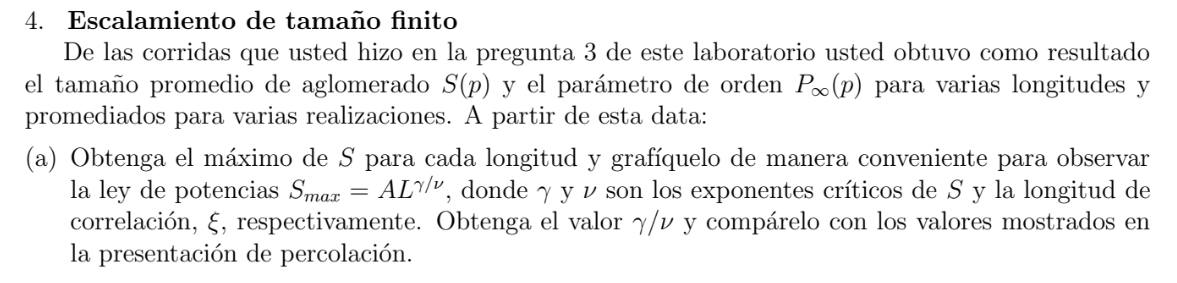





gamma/nu=  0.2872014403003031
log(A)=  0.41801639598551743


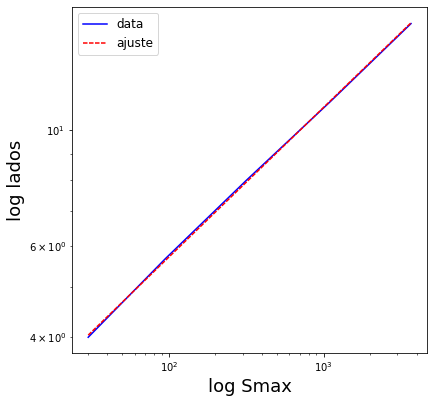

In [8]:
loglados = np.log(lados**0.5)
logSmax = np.log(Smax)
fig = plt.figure(figsize = (14,14))

ax5 = fig.add_subplot(2,2,2)
slope, corte = lineFit(logSmax,loglados)
ajuste = slope*logSmax + corte
ax5.loglog(Smax,lados**0.5,'b',label = r'data')
ax5.loglog(Smax,np.exp(ajuste),color = 'red',dashes = (3,1),label = "ajuste")
ax5.legend(loc = 'best',fontsize = 12)
ax5.set_xlabel("log Smax",fontsize = 18)
ax5.set_ylabel("log lados",fontsize = 18)
print("gamma/nu= ",slope)
print("log(A)= ",corte)

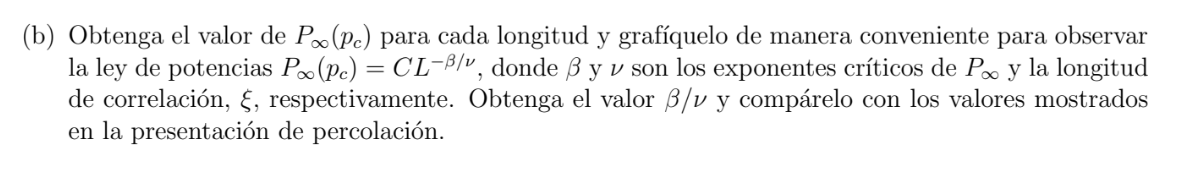

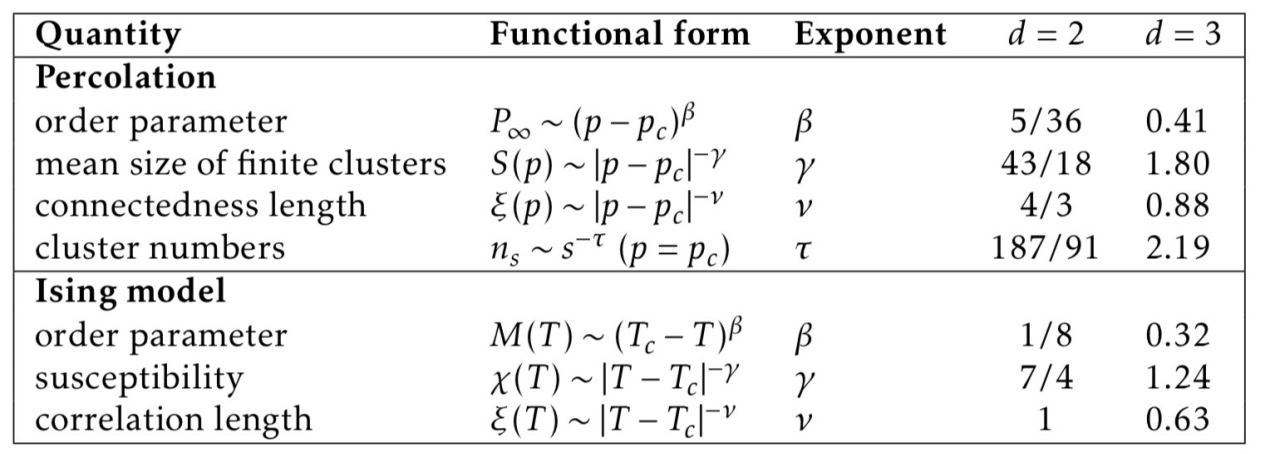

### Discusión: El cambio en Smax conforme aumenta el número de lados es de tipo exponencial, debido a que la gráfica log log da una recta perfecta. gamma/mu~0.11 y A= exp(0.212), esto era de esperarse ya que al aumentar el número de lados de manera exponencial también aumentara el número de lugares disponibles donde se puedan formar los clusters.

-beta/nu=  -2.609880682756298
log(C)=  -1.032565280466081


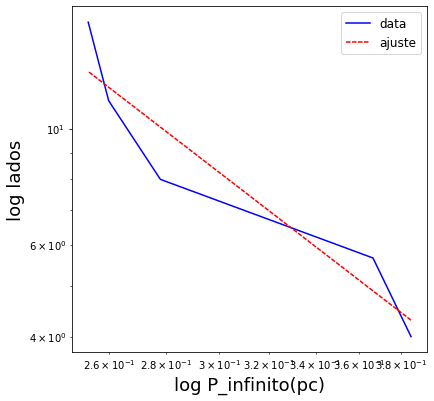

In [9]:
loglados = np.log(lados**0.5)
logP_infty = np.log(P_infty)
fig = plt.figure(figsize = (14,14))

ax5 = fig.add_subplot(2,2,2)
slope, corte = lineFit(logP_infty,loglados)
ajuste = slope*logP_infty + corte
ax5.loglog(P_infty,lados**0.5,'b',label = r'data')
ax5.loglog(P_infty,np.exp(ajuste),color = 'red',dashes = (3,1),label = "ajuste")
ax5.legend(loc = 'best',fontsize = 12)
ax5.set_xlabel("log P_infinito(pc)",fontsize = 18)
ax5.set_ylabel("log lados",fontsize = 18)
print("-beta/nu= ",slope)
print("log(C)= ",corte)

### Discusión: el  parámetro de orden evaluado en pc también se comporta tipo ley de potencias con un pendiente negativa aunque los datos no se pegan a la recta de manera tan precisa como en Smax.

In [15]:
slope,corte = lineFit(np.log(lados),np.log(Smax))

In [16]:
slope

1.7405906498024313